# matplotlib 绘制数据动画
> matplotlib制作数据动画方法汇总。

- toc: true
- author: Lei Yu
- categories: [matplotlib]

In [1]:
#collapse-hide
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
from IPython.display import HTML

%matplotlib inline

# 散点图

## 改变颜色

定义数据：

In [64]:
numPoints = 10
numFrames = 20
colorData = np.random.randint(0,255,size=(numFrames, numPoints))

points = np.random.uniform(0,1,size=(numPoints, 2))

更新绘制数据：

In [65]:
def update(i, scat):
    scat.set_array(colorData[i])
    return scat,

画图:

In [ ]:
fig, ax = plt.subplots()
scat = ax.scatter(points[:,0], points[:,1], s=100, c=colorData[0])
ani = animation.FuncAnimation(fig, update, frames=numFrames,
                              fargs=(scat,))

在jupyter notebook交互式显示动画

In [61]:
HTML(ani.to_jshtml())

## 改变坐标

In [69]:
numPoints = 10
numFrames = 20
pos = np.random.uniform(low=-5,high=5,size=[1,numPoints,2])
pos = np.repeat(pos, repeats=numFrames,axis=0)
delta_pos = np.c_[np.linspace(0,5,numFrames),-np.linspace(0,5,numFrames)][:,None,:]
delta_pos = np.repeat(delta_pos,repeats=numPoints, axis=1)
pos = pos+delta_pos

In [70]:
def update(i, scat):
    scat.set_offsets(pos[i])
    return scat,

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(-5,10)
ax.set_ylim(-10,5)
scat = ax.scatter(points[:,0], points[:,1], s=100)
ani = animation.FuncAnimation(fig, update, frames=numFrames,
                              fargs=(scat,))

In [72]:
HTML(ani.to_jshtml())

In [73]:
HTML(ani.to_html5_video())

In [75]:
ani.save('test.gif', writer='imagemagick')

In [ ]:
ani.save('test.mp4')

## 气球

In [ ]:
# Define properties of the "bouncing balls"
n = 10
pos = (20 * np.random.sample(n*2) - 10).reshape(n, 2)
vel = (0.3 * np.random.normal(size=n*2)).reshape(n, 2)
# vel = np.c_[np.ones((n,1)),-np.ones((n,1))]

sizes = 100 * np.random.sample(n) + 100

# Colors where each row is (Red, Green, Blue, Alpha).  Each can go
# from 0 to 1.  Alpha is the transparency.
colors = np.random.sample([n, 4])

fig, ax = plt.subplots()
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

def update(i,circles):
    global pos, vel
    pos = pos+vel
    bounce = abs(pos) > 10      # Find balls that are outside walls
    vel[bounce] = -vel[bounce]  # Bounce if outside the walls
    circles.set_offsets(pos)    # Change the positions
    return circles,

# Draw all the circles and return an object ``circles`` that allows
# manipulation of the plotted circles.
circles = ax.scatter(pos[:,0], pos[:,1], marker='o', s=sizes, c=colors)

ani = animation.FuncAnimation(fig, update, frames=20, fargs=(circles,))

In [79]:
HTML(ani.to_jshtml())

# 其他

## 旋转箭头

In [4]:
x = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
y = np.linspace(-3, 3, 91)
X3, Y3, T3 = np.meshgrid(x, y, t)
sinT3 = np.sin(2*np.pi*T3 /
               T3.max(axis=2)[..., np.newaxis])
G = (X3**2 + Y3**2)*sinT3

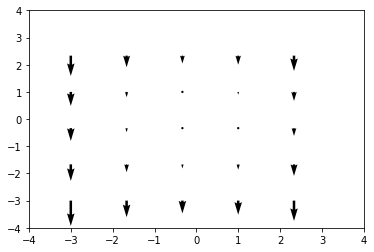

In [9]:
fig, ax = plt.subplots()
ax.set(xlim=(-4, 4), ylim=(-4, 4))
 
# Plot every 20th arrow
step = 20
x_q, y_q = x[::step], y[::step]
 
# Create U and V vectors to plot
U = G[::step, ::step, :]
V = np.roll(U, shift=3, axis=2)
 
qax = ax.quiver(x_q, y_q,
                U[..., 0], V[..., 0],
                scale=100)
 
def animate(i, qax):
    qax.set_UVC(U[..., i], V[..., i])

In [10]:
ani = animation.FuncAnimation(fig, animate, frames=20, fargs=(qax,))

In [11]:
HTML(ani.to_jshtml())

## 曲线图走势图

In [2]:
df = pd.read_csv('data.csv', usecols=['name', 'group', 'year', 'value'])
df.head(3)

,name,group,year,value
0,Agra,India,1575,200.0
1,Agra,India,1576,212.0
2,Agra,India,1577,224.0


In [3]:
cities = ['Shanghai', 'New York']
df = df[df.name.isin(cities) & (df.year<2019) & (df.year>1929)][['name', 'year', 'value']]

In [4]:
population = [df[df.name==c].sort_values(by='year').value.values for c in cities]
year = np.linspace(1930, 2018, 89)

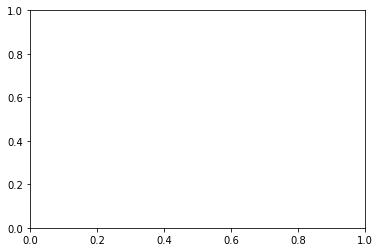

In [5]:
fig, ax = plt.subplots()

In [6]:
def update(y, year, population, ax):
    ax.clear()
    line1, = ax.plot(year[:y], population[0][:y], color='b')
    line2, = ax.plot(year[:y], population[1][:y], color='r')
    line1.set_marker('o')
    line2.set_marker('o')
    line1.set_markevery([y-1])
    line2.set_markevery([y-1])
    ax.text(year[y-1]-1, population[0][y-1]+1000, 'Shanghai', size=10, weight=600)
    ax.text(year[y-1]+2, population[0][y-1]-500, f'{int(population[0][y-1])}')
    ax.text(year[y-1]-1, population[1][y-1]+1000, 'New York', size=10, weight=600)
    ax.text(year[y-1]+2, population[1][y-1]-500, f'{int(population[1][y-1])}')
    ax.set_ylim(np.min(population[0]),np.max(population[0]))
    ax.set_xlim(1929,2019)
    ax.text(0, 1.02, 'Shanghai -- New York',
            transform=ax.transAxes, size=18, weight=600, ha='left')
    return ax

ani = animation.FuncAnimation(fig, update, 89, fargs=(year, population, ax), interval=100)

In [235]:
HTML(ani.to_html5_video())

## bar chart race

- ref:https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41

以年为单位绘制1968年到2018年人口数目前十的世界城市变化图。

In [13]:
df = pd.read_csv('data.csv', usecols=['name', 'group', 'year', 'value'])
df.head(3)

,name,group,year,value
0,Agra,India,1575,200.0
1,Agra,India,1576,212.0
2,Agra,India,1577,224.0


In [14]:
#hide
current_year = 2018
dff = df[df['year'].eq(current_year)].sort_values(by='value', ascending=True).head(10)
dff

,name,group,year,value
2537,Karachi,Asia,2018,18185.2
4327,New York,North America,2018,18713.0
1336,Dhaka,Asia,2018,19632.6
1195,Cairo,Middle East,2018,19849.6
4679,Osaka,Asia,2018,20409.0
3574,Mexico City,Latin America,2018,21520.4
5445,Sao Paulo,Latin America,2018,21697.8
3748,Mumbai,India,2018,22120.0
689,Beijing,Asia,2018,22674.2
5547,Shanghai,Asia,2018,25778.6


<BarContainer object of 10 artists>

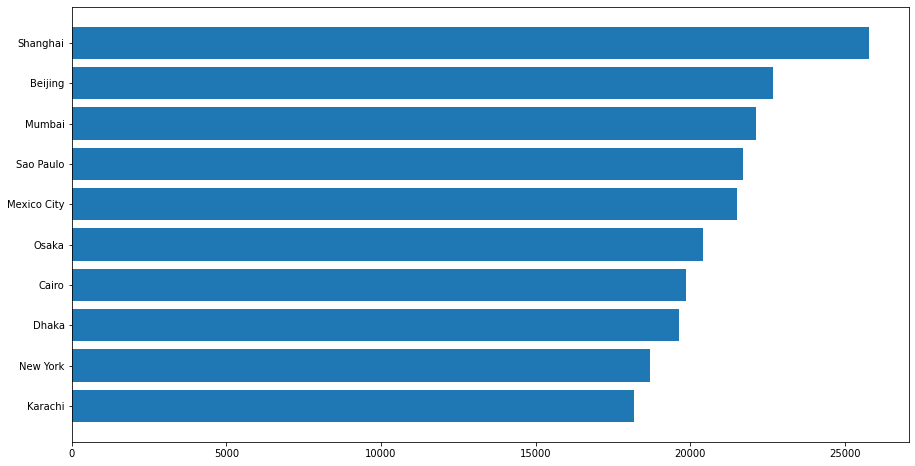

In [15]:
#hide
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

In [16]:
colors = dict(zip(
    ['India','Europe','Asia','Latin America','Middle East','North America','Africa'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50']
))
group_lk = df.set_index('name')['group'].to_dict()

In [11]:
#hide
dff = dff[::-1]   # flip values from top to bottom

In [ ]:
#hide
fig, ax = plt.subplots(figsize=(15, 8))
# pass colors values to `color=`
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-0.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

In [28]:
def draw_barchart(year, ax):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous cities in the world from 1500 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @matplotlib', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='cyan', alpha=0.8, edgecolor='white'))
    plt.box(False)
    return ax,

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, fargs=(ax,), frames=range(1968, 2019))

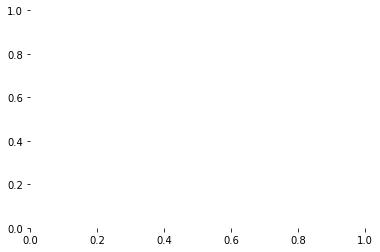

In [30]:
HTML(animator.to_html5_video())